In [1]:
import numpy as np
import pandas as pd

In [2]:
# data is as of 01/19/2021

mx_covid = pd.read_csv('/Users/keila/Documents/Lambda/Project/project_covid/01_19_21.csv', encoding = 'ISO-8859-1')
mx_covid

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-19,1474bf,2,9,9,1,9,15,106,1,...,99,1,1,2,97,3,99,MÃ©xico,97,97
1,2021-01-19,2af09a,2,12,9,2,9,9,14,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
2,2021-01-19,063865,1,4,9,1,9,9,14,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
3,2021-01-19,1549d7,2,4,9,2,9,30,102,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
4,2021-01-19,054e2e,2,12,9,2,15,15,20,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190180,2021-01-19,263aac,2,12,9,2,32,9,15,1,...,1,2,97,1,2,7,99,MÃ©xico,97,97
4190181,2021-01-19,27986f,1,12,14,1,14,14,39,1,...,1,2,97,1,1,3,99,MÃ©xico,97,97
4190182,2021-01-19,43bb72,2,12,9,1,9,9,12,1,...,1,2,97,1,2,7,99,MÃ©xico,97,97
4190183,2021-01-19,3d52a3,2,12,9,2,9,9,10,1,...,1,2,97,1,2,1,99,MÃ©xico,97,97


In [3]:
# making sure each row is a unique person

mx_covid['ID_REGISTRO'].value_counts().unique()

# each row is a unique person --> no repititions

array([1])

# Feature Engineering

In [4]:
# keep only a few useful columns
mx_covid = mx_covid[['ID_REGISTRO', 'SEXO', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'EDAD', 'HABLA_LENGUA_INDIG', 
          'INDIGENA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL']].copy()

In [5]:
mx_covid.head()

,ID_REGISTRO,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,HABLA_LENGUA_INDIG,INDIGENA,RESULTADO_LAB,CLASIFICACION_FINAL
0,1474bf,1,2020-04-05,2020-03-30,37,2,2,1,3
1,2af09a,2,2020-03-11,2020-03-11,73,99,99,1,3
2,063865,1,2020-03-27,2020-03-27,59,2,2,1,3
3,1549d7,2,2020-04-03,2020-03-27,65,2,2,1,3
4,054e2e,2,2020-04-06,2020-03-26,70,2,2,1,3


In [6]:
# date of symptom onset.....don't think I will use this for analysis because this could be affected by human error
mx_covid['FECHA_SINTOMAS'].value_counts()

2021-01-04    33808
2020-12-01    33004
2020-12-10    32015
2020-12-28    31849
2021-01-01    31737
              ...  
2020-01-01      288
2020-01-03      248
2020-01-04      245
2020-01-02      234
2021-01-19       41
Name: FECHA_SINTOMAS, Length: 385, dtype: int64

In [7]:
# date medical attention was saught (this includes getting tested)
# I will use this date column to test my hypothesis
mx_covid['FECHA_INGRESO'].value_counts()

2021-01-05    39163
2021-01-14    38423
2021-01-04    37233
2021-01-11    36826
2020-12-29    36626
              ...  
2020-02-08      102
2020-02-01       96
2020-01-11       93
2020-01-04       80
2020-01-01       36
Name: FECHA_INGRESO, Length: 385, dtype: int64

In [8]:
# import datetime package to convert FECHA_INGRESO into datetime type and work with it that way
import datetime

In [9]:
# what is the current type of the data in FECHA_INGRESO?
type(mx_covid['FECHA_INGRESO'].iloc[500])

str

In [10]:
# convert data in FECHA_INGRESO to datetime
mx_covid['FECHA_INGRESO'] = pd.to_datetime(mx_covid['FECHA_INGRESO'])
mx_covid['FECHA_INGRESO'].dtype

dtype('<M8[ns]')

In [11]:
# check it has converted datetime in correct order
mx_covid['FECHA_INGRESO'].iloc[0].month

4

In [12]:
# create new column PRE_POST_XMAS 
# using 'antes' (before) and 'despues' (after), so that crosstab will yield plot I want later on
mx_covid.loc[((mx_covid['FECHA_INGRESO'] >= pd.to_datetime('11/18/2020')) & (mx_covid['FECHA_INGRESO'] <= pd.to_datetime('12/18/2020'))), 'PRE_POST_XMAS'] = 'antes'
mx_covid.loc[((mx_covid['FECHA_INGRESO'] >= pd.to_datetime('12/19/2020')) & (mx_covid['FECHA_INGRESO'] <= pd.to_datetime('1/18/2021'))), 'PRE_POST_XMAS'] = 'despues'

In [13]:
# check it worked
mx_covid

,ID_REGISTRO,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,HABLA_LENGUA_INDIG,INDIGENA,RESULTADO_LAB,CLASIFICACION_FINAL,PRE_POST_XMAS
0,1474bf,1,2020-04-05,2020-03-30,37,2,2,1,3,NaN
1,2af09a,2,2020-03-11,2020-03-11,73,99,99,1,3,NaN
2,063865,1,2020-03-27,2020-03-27,59,2,2,1,3,NaN
3,1549d7,2,2020-04-03,2020-03-27,65,2,2,1,3,NaN
4,054e2e,2,2020-04-06,2020-03-26,70,2,2,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...
4190180,263aac,2,2021-01-12,2021-01-12,61,2,2,97,7,despues
4190181,27986f,1,2021-01-06,2021-01-03,33,2,2,97,3,despues
4190182,43bb72,1,2021-01-07,2021-01-07,21,2,2,97,7,despues
4190183,3d52a3,2,2021-01-07,2021-01-07,75,2,2,97,1,despues


In [14]:
# drop dates that will not be used in analysis
mx_covid_xmas = mx_covid.dropna()
print('The shape of the dataframe to be used in analyzing COVID before & after Xmas:', mx_covid_xmas.shape)

The shape of the dataframe to be used in analyzing COVID before & after Xmas: (1511028, 10)


# Data Analysis 

## Analyzing Mean COVID Cases Before & After Christmas


In [15]:
# different classifications for determining whether covid case or not
mx_covid_xmas['CLASIFICACION_FINAL'].value_counts()

7    800009
3    554430
6    106932
1     40213
5      7429
4      1536
2       479
Name: CLASIFICACION_FINAL, dtype: int64

In [16]:
# 7 is negative
# 3 is positive
# the rest are classifications NOT based solely on covid test results

# add the hard positives and negatives to find total number of determined cases
definitive = mx_covid_xmas['CLASIFICACION_FINAL'].value_counts()[7] + mx_covid_xmas['CLASIFICACION_FINAL'].value_counts()[3]
print(definitive)

1354439


In [17]:
# percentage of cases that have definitive classification

definitive/(len(mx_covid_xmas['CLASIFICACION_FINAL'])) *100

89.63692267780611

### Analysis Using Definitive Classifications of COVID Incidence

In [18]:
# subset mx_covid_xmas to only have definitive classifications for covid cases
def_mx_covid = mx_covid_xmas[(mx_covid['CLASIFICACION_FINAL'] == 7) | (mx_covid_xmas['CLASIFICACION_FINAL'] == 3)].copy()
def_mx_covid.head()

<ipython-input-18-4c552260d6a1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  def_mx_covid = mx_covid_xmas[(mx_covid['CLASIFICACION_FINAL'] == 7) | (mx_covid_xmas['CLASIFICACION_FINAL'] == 3)].copy()


,ID_REGISTRO,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,HABLA_LENGUA_INDIG,INDIGENA,RESULTADO_LAB,CLASIFICACION_FINAL,PRE_POST_XMAS
1217855,3539d2,2,2020-11-22,2020-09-26,50,2,2,1,3,antes
1296690,0aa0bc,1,2021-01-04,2020-07-22,49,2,2,2,7,despues
1354580,38e56d,1,2020-11-25,2020-09-09,33,2,2,2,7,antes
2013557,299d07,1,2020-12-07,2020-12-05,71,2,2,1,3,antes
2013558,20d955,1,2020-12-05,2020-11-29,50,2,2,1,3,antes


I will perform a chi-squared test on the mean positive COVID cases before and after Christmas.

In [19]:
# make def_mx_covid into tidy data for chi-square test
def_mx_covid = def_mx_covid[['CLASIFICACION_FINAL', 'PRE_POST_XMAS']]
def_mx_covid

,CLASIFICACION_FINAL,PRE_POST_XMAS
1217855,3,antes
1296690,7,despues
1354580,7,antes
2013557,3,antes
2013558,3,antes
...,...,...
4190179,7,despues
4190180,7,despues
4190181,3,despues
4190182,7,despues


In [20]:
# write function to make tidy data
def fix_classification(num):
    '''Change classification from 3,7 to 0,1'''
    if num == 3:
        new_class = 1
    else:
        new_class = 0
    return new_class       

In [21]:
# Apply function to CLASIFICACION_FINAL
def_mx_covid['CLASIFICACION_FINAL'] = def_mx_covid['CLASIFICACION_FINAL'].apply(fix_classification)
def_mx_covid

,CLASIFICACION_FINAL,PRE_POST_XMAS
1217855,1,antes
1296690,0,despues
1354580,0,antes
2013557,1,antes
2013558,1,antes
...,...,...
4190179,0,despues
4190180,0,despues
4190181,1,despues
4190182,0,despues


$H_o$ : There is no relationship between time period and incidence of COVID.


$H_a$ : There is a relationship between time period and incidence of COVID.

Before Christmas: 11/18/2020 to 12/18/2020

After Christmas: 12/19/2020 to 1/18/2021

In [22]:
# look at normalized frequency of data
pd.crosstab(def_mx_covid['PRE_POST_XMAS'], def_mx_covid['CLASIFICACION_FINAL'], margins = True, normalize = True)

CLASIFICACION_FINAL,0,1,All
PRE_POST_XMAS,,,
antes,0.294555,0.196657,0.491212
despues,0.296102,0.212686,0.508788
All,0.590657,0.409343,1.000000


In [23]:
# perform the chi-squared test
import scipy
from scipy import stats

g, p, dof, expctd = scipy.stats.chi2_contingency(
    pd.crosstab(def_mx_covid['PRE_POST_XMAS'], def_mx_covid['CLASIFICACION_FINAL']))

print(g)
print(p)

437.26812592954144
4.256096488159473e-97


I reject the null hypothesis. There is a statistically significant relationship between the time period and incidence of COVID. I conclude this at the 0.05 significance level, because my p-value is smaller than the significance level. The Chi-square statistic is also quite large, which further implicates a statistically significant relationship.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

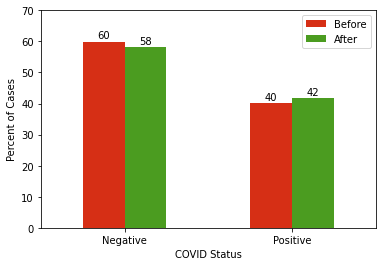

In [179]:
# visualize the data with only the definitive classifications
ax1 = (pd.crosstab(def_mx_covid['CLASIFICACION_FINAL'], def_mx_covid['PRE_POST_XMAS'], normalize = 'columns')*100
           ).plot(kind = 'bar', color = ['#D62F15', '#4B9C20'], width = 0.5)

ax1.set_xlabel('COVID Status')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Negative', 'Positive'], rotation = 'horizontal')
ax1.legend(['Before', 'After'])
ax1.set_ylabel('Percent of Cases')
ax1.set_ylim([0, 70])

# write up a function to label bars in bar chart
def label_bars_pct(ax, spacing = 1):
    '''This function will label bars in a bar plot with the value of that bar, when the bar is a percent.'''
    for bar in ax.patches:
        y = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        space = spacing
        va = 'bottom'
        label = "{:.2f}".format(y)
        ax.annotate(label, (x, y), xytext = (0, space), textcoords = 'offset points', ha = 'center', va = va)

        
# apply the new function to plot        
label_bars(ax1)        

plt.show()

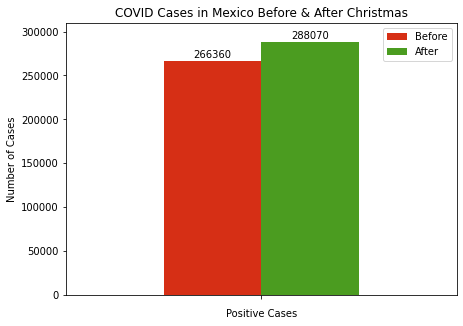

In [230]:
# create plot for write up

# separate out only the positive cases
def_pos = def_mx_covid[def_mx_covid['CLASIFICACION_FINAL'] == 1]

# visualize the data
ax1_5 = pd.crosstab(def_pos['CLASIFICACION_FINAL'], def_pos['PRE_POST_XMAS']).plot(
    kind = 'bar', color = ['#D62F15', '#4B9C20'], figsize = (7, 5))

ax1_5.set_ylim([0, 310000])
ax1_5.set_xticks([1])
ax1_5.set_xticklabels([' '])
ax1_5.set_xlabel('Positive Cases')
ax1_5.set_ylabel('Number of Cases')
ax1_5.legend(['Before', 'After'])
ax1_5.set_title('COVID Cases in Mexico Before & After Christmas')

# will be using the actual counts of COVID cases, so have to write a new function
def label_bars(ax, spacing = 1):
    '''This function will label bars in a bar plot with the value of that bar, when the bar is a count.'''
    for bar in ax.patches:
        y = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        space = spacing
        va = 'bottom'
        label = "{:.0f}".format(y)
        ax.annotate(label, (x, y), xytext = (0, space), textcoords = 'offset points', ha = 'center', va = va)
        

# apply function to plot        
label_bars(ax1_5)

# save figure to use in write up
plt.savefig('Before_After_Xmas_Def.png')

### Analysis Using Non-Definitive Classifications of COVID Incidence

In [27]:
# in CLASIFICACION_FINAL 1-3 is a positive case (or as close to a positive case, since not all are determined by
# lab result)
# while 4-7 is a negative case (or as close to negative as possible, 
# since these are not definitive classifications)

# make dataframe with only 2 cols I need
non_def_mx_covid = mx_covid_xmas[['CLASIFICACION_FINAL', 'PRE_POST_XMAS']].copy()

# change classifications to be useful for analysis --> tidy data
non_def_mx_covid.loc[non_def_mx_covid['CLASIFICACION_FINAL'] <= 3, 'CLASIFICACION_FINAL'] = 1
non_def_mx_covid.loc[non_def_mx_covid['CLASIFICACION_FINAL'] > 3, 'CLASIFICACION_FINAL'] = 0

In [28]:
# let's look at new dataframe
non_def_mx_covid

# looks like tidy data!

,CLASIFICACION_FINAL,PRE_POST_XMAS
1217855,1,antes
1296690,0,despues
1354580,0,antes
2013557,1,antes
2013558,1,antes
...,...,...
4190180,0,despues
4190181,1,despues
4190182,0,despues
4190183,1,despues


$H_o$ : There is no relationship between time period and incidence of COVID.


$H_a$ : There is a relationship between time period and incidence of COVID.

In [29]:
# look at normalized frequency of data
pd.crosstab(non_def_mx_covid['PRE_POST_XMAS'], non_def_mx_covid['CLASIFICACION_FINAL'], margins = True, 
            normalize = True)

CLASIFICACION_FINAL,0,1,All
PRE_POST_XMAS,,,
antes,0.295108,0.188758,0.483867
despues,0.311039,0.205094,0.516133
All,0.606148,0.393852,1.000000


In [30]:
# perform the Chi-square test

g, p, dof, expctd = scipy.stats.chi2_contingency(
    pd.crosstab(non_def_mx_covid['PRE_POST_XMAS'], non_def_mx_covid['CLASIFICACION_FINAL']))

print(g)
print(p)

83.34543596343681
6.889769191190268e-20


Even with the inclusion of classifications that are not definitive, I am able to reject the null hypothesis. With a significance level of 0.05, my p-value allows me to reject the null hypothesis, because the p-value is smaller than 0.05. The Chi-square statistic is large, further implicating a statisitically significant relationship between time period and incidence of COVID.

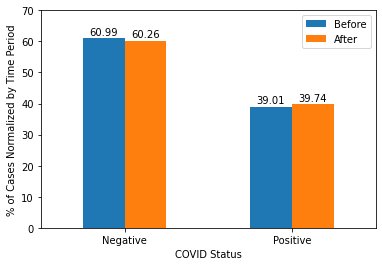

In [215]:
# visualize the analysis with all COVID classifications
ax2 = (pd.crosstab(non_def_mx_covid['CLASIFICACION_FINAL'], non_def_mx_covid['PRE_POST_XMAS'], normalize = 'columns'
            )*100).plot(kind = 'bar')

ax2.set_xlabel('COVID Status')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Negative', 'Positive'], rotation = 'horizontal')
ax2.legend(['Before', 'After'])
ax2.set_ylabel('% of Cases Normalized by Time Period')
ax2.set_ylim([0, 70])

label_bars_pct(ax2)

plt.show()

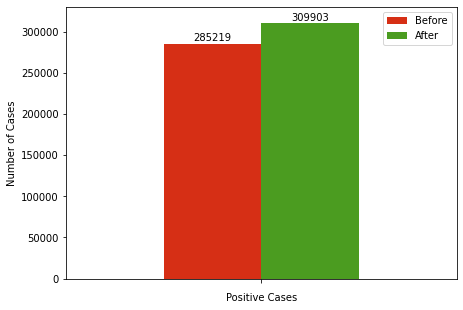

In [218]:
# create plot for write up

# separate out only the positive cases
nondef_pos = non_def_mx_covid[non_def_mx_covid['CLASIFICACION_FINAL'] == 1]

# visualize the data
ax2_5 = pd.crosstab(nondef_pos['CLASIFICACION_FINAL'], nondef_pos['PRE_POST_XMAS']).plot(
    kind = 'bar', color = ['#D62F15', '#4B9C20'], figsize = (7, 5))

ax2_5.set_ylim([0, 330000])
ax2_5.set_xticks([1])
ax2_5.set_xticklabels([' '])
ax2_5.set_xlabel('Positive Cases')
ax2_5.set_ylabel('Number of Cases')
ax2_5.legend(['Before', 'After'])

# apply function to plot        
label_bars(ax2_5)

## Analyzing COVID's Impact on Indigenous Population of Mexico

In [33]:
# have another look at the original dataframe with all the data
mx_covid

,ID_REGISTRO,SEXO,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,HABLA_LENGUA_INDIG,INDIGENA,RESULTADO_LAB,CLASIFICACION_FINAL,PRE_POST_XMAS
0,1474bf,1,2020-04-05,2020-03-30,37,2,2,1,3,NaN
1,2af09a,2,2020-03-11,2020-03-11,73,99,99,1,3,NaN
2,063865,1,2020-03-27,2020-03-27,59,2,2,1,3,NaN
3,1549d7,2,2020-04-03,2020-03-27,65,2,2,1,3,NaN
4,054e2e,2,2020-04-06,2020-03-26,70,2,2,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...
4190180,263aac,2,2021-01-12,2021-01-12,61,2,2,97,7,despues
4190181,27986f,1,2021-01-06,2021-01-03,33,2,2,97,3,despues
4190182,43bb72,1,2021-01-07,2021-01-07,21,2,2,97,7,despues
4190183,3d52a3,2,2021-01-07,2021-01-07,75,2,2,97,1,despues


In [34]:
# subset the dataframe to only contain what we need
indig = mx_covid[['ID_REGISTRO','HABLA_LENGUA_INDIG', 'INDIGENA', 'CLASIFICACION_FINAL']]

In [35]:
# 99 is not specified
# more people did not specify if they spoke a native language
indig['HABLA_LENGUA_INDIG'].value_counts()

2     3971613
99     191237
1       27335
Name: HABLA_LENGUA_INDIG, dtype: int64

In [36]:
# less people did not specify if they identidy as indigenous than if they spoke a native language
# I will use this column for the analysis
indig['INDIGENA'].value_counts()

2     3965247
99     187303
1       37635
Name: INDIGENA, dtype: int64

In [37]:
# further subset to include the only columns to be used in analysis
indig = indig[['INDIGENA', 'CLASIFICACION_FINAL']]

In [38]:
# only keeping the observations that have a specified answer
indig_spec = indig[indig['INDIGENA'] < 10].copy()

In [39]:
# set the values in INDIGENA to usable numbers for analysis
indig_spec.loc[indig_spec['INDIGENA'] == 2, 'INDIGENA'] = 0

#check that the desired change occurred
indig_spec['INDIGENA'].value_counts()

0    3965247
1      37635
Name: INDIGENA, dtype: int64

In [40]:
# the percentage of observations in the entire dataset that are from people who identify as indigenous
yes_indig = indig_spec['INDIGENA'].value_counts()[1]
(yes_indig / len(indig_spec))*100

0.9401975876381067

Less than 1% of the observations are from people who identify as indigenous. In Mexico, about 20% of the population is indigenous, so this dataset is possibly not very representative of Mexico's population. Either COVID is not affecting the indigenous, or maybe they are having a harder time accessing medical attention, which leads to them not being represented in the dataset.

In [41]:
indig_spec

,INDIGENA,CLASIFICACION_FINAL
0,0,3
2,0,3
3,0,3
4,0,3
5,0,3
...,...,...
4190180,0,7
4190181,0,3
4190182,0,7
4190183,0,1


### Analysis with Non-Definitive Classifications

In [42]:
non_def_indig_spec = indig_spec.copy()

In [43]:
# I will use all classifications of COVID, separated in the same way as earlier in this project.
non_def_indig_spec.loc[indig_spec['CLASIFICACION_FINAL'] <= 3, 'CLASIFICACION_FINAL'] = 1
non_def_indig_spec.loc[indig_spec['CLASIFICACION_FINAL'] > 3, 'CLASIFICACION_FINAL'] = 0

$H_o$ : There is no relationship between identifying as indigenous and COVID incidence.

$H_a$ : There is a relationship between identifying as indigenous and COVID incidence.

In [44]:
# frequencies of data
pd.crosstab(non_def_indig_spec['INDIGENA'], non_def_indig_spec['CLASIFICACION_FINAL'], margins = True, normalize = 'index')

CLASIFICACION_FINAL,0,1
INDIGENA,,
0,0.599443,0.400557
1,0.615039,0.384961
All,0.599589,0.400411


In [45]:
# performed Chi-square test
g, p, dof, expctd = scipy.stats.chi2_contingency(
    pd.crosstab(non_def_indig_spec['INDIGENA'], non_def_indig_spec['CLASIFICACION_FINAL']))

print(g)
print(p)

37.70870489267315
8.213720948138821e-10


I reject the null hypothesis at an alpha level of 0.05. Because the p-value is smaller than the alpha level, I conclude that there is a statistically significant relationship between identifying as indigenous and incidence of COVID. The Chi-square statistic is large, further implicating a statistically significant relationship between identifying as indigenous and incidence of COVID. 

Indigenous people are underrepresented in the dataset. They only make up 0.94% of the dataset, when they actually make up 20% of Mexico's population.

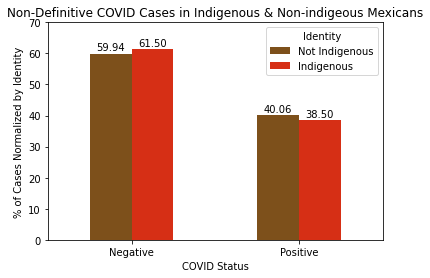

<Figure size 432x288 with 0 Axes>

In [234]:
ax3 = (pd.crosstab(non_def_indig_spec['CLASIFICACION_FINAL'], non_def_indig_spec['INDIGENA'], normalize = 'columns'
            )*100).plot(kind = 'bar', color = ['#7D501B', '#D62F15'])

ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Negative', 'Positive'], rotation = 'horizontal')
ax3.legend(['Not Indigenous', 'Indigenous'], title = 'Identity')
ax3.set_xlabel('COVID Status')
ax3.set_ylabel('% of Cases Normalized by Identity')
ax3.set_ylim([0, 70])
ax3.set_title('Non-Definitive COVID Cases in Indigenous & Non-indigeous Mexicans')
label_bars_pct(ax3)

plt.show()

# save figure to use in write up
plt.savefig('Non_Def_Indig.png')

### Analysis with Definitive Classifications

In [48]:
indig_spec

,INDIGENA,CLASIFICACION_FINAL
0,0,3
2,0,3
3,0,3
4,0,3
5,0,3
...,...,...
4190180,0,7
4190181,0,3
4190182,0,7
4190183,0,1


In [52]:
# subset to only have definitive classifications
def_indig_spec = indig_spec[(indig_spec['CLASIFICACION_FINAL'] == 7) | (indig_spec['CLASIFICACION_FINAL'] == 3)].copy()
def_indig_spec.head()

,INDIGENA,CLASIFICACION_FINAL
0,0,3
2,0,3
3,0,3
4,0,3
5,0,3


In [53]:
# apply function that makes data tidy
def_indig_spec['CLASIFICACION_FINAL'] = def_indig_spec['CLASIFICACION_FINAL'].apply(fix_classification)
def_indig_spec

,INDIGENA,CLASIFICACION_FINAL
0,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
4190179,0,0
4190180,0,0
4190181,0,1
4190182,0,0


$H_o$ : There is no relationship between COVID incidence and identifying as indigenous.

$H_a$ : There is a relationship between COVID incidence and identifying as indigenous.

In [54]:
# percent of frequencies of data
pd.crosstab(def_indig_spec['INDIGENA'], def_indig_spec['CLASIFICACION_FINAL'], margins = True, normalize = 'index') * 100

CLASIFICACION_FINAL,0,1
INDIGENA,,
0,56.544279,43.455721
1,55.959941,44.040059
All,56.539036,43.460964


In [55]:
# performed Chi-square test
g, p, dof, expctd = scipy.stats.chi2_contingency(
    pd.crosstab(def_indig_spec['INDIGENA'], def_indig_spec['CLASIFICACION_FINAL']))

print(g)
print(p)

4.3351996623620614
0.03733203715451812


I reject the null hypothesis. Therefore, at the alpha level of 0.05, I conclude that there is a statistically significant relationship between being indigenous and COVID incidence in Mexico. The p-value smaller than the alpha level and a large Chi-square statistic implicate a relationship between identifying as indigenous and incidence of COVID.

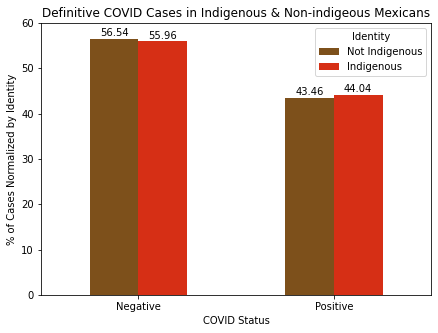

<Figure size 432x288 with 0 Axes>

In [235]:
# Visualize the data with only the definitive classifications
ax4 = (pd.crosstab(def_indig_spec['CLASIFICACION_FINAL'], def_indig_spec['INDIGENA'], normalize = 'columns'
                  )*100).plot(kind = 'bar', figsize = (7, 5), color = ['#7D501B', '#D62F15'])

ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Negative', 'Positive'], rotation = 'horizontal')
ax4.legend(['Not Indigenous', 'Indigenous'], title = 'Identity')
ax4.set_xlabel('COVID Status')
ax4.set_ylabel('% of Cases Normalized by Identity')
ax4.set_ylim([0, 60])
ax4.set_title('Definitive COVID Cases in Indigenous & Non-indigeous Mexicans')

label_bars_pct(ax4)

plt.show()

# save figure to use in write up
plt.savefig('Def_Indig.png')